In [1]:
import os
os.chdir('..')

# Download Data and Results

In [ ]:
%pip install gdown

In [ ]:
import gdown

gdown.download(id='1CBwtoTRmNgY9Hbg_dUr2YOuY2YN-UE_Y', output='data.zip', quiet=False)
# or from here: https://drive.google.com/file/d/1CBwtoTRmNgY9Hbg_dUr2YOuY2YN-UE_Y/view?usp=sharing
gdown.download(id='1IjKUQh6yOrm-oUZHtSnBmQlKyBV-3k1v', output='results.zip', quiet=False)
# or from here: https://drive.google.com/file/d/1IjKUQh6yOrm-oUZHtSnBmQlKyBV-3k1v/view?usp=sharing

In [ ]:
import zipfile

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('./')
with zipfile.ZipFile('results.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

# Store Init Models

In [ ]:
from fair_graphs.models.graph_models import SSF, GCNEncoder

## German

In [ ]:
from fair_graphs.datasets.graph_datasets import GermanData

data = GermanData(sensitive_attribute = 'Gender',
                  target_attribute = 'GoodCustomer',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)
data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

In [ ]:
enc_params = {'in_channels': data.samples.shape[1],
              'out_channels': data.samples.shape[1]}

fixed_params = {'num_hidden': data.samples.shape[1],
                'num_projection_hidden': data.samples.shape[1],
                'num_class': 1} 

enc = GCNEncoder(**enc_params)
net = SSF(enc, **fixed_params)
net.save_state_dict(save_path='data/model_init',
                    name_extension=f"init_german{'_sensitiveFalse' if not data.include_sensitive else ''}",
                    device=None)

## Bail

In [ ]:
from fair_graphs.datasets.graph_datasets import BailData

data = BailData(sensitive_attribute = 'WHITE',
                target_attribute = 'RECID',
                include_sensitive = True,
                num_samples = 0,
                pre_scale_features = False)

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

In [ ]:
enc_params = {'in_channels': data.samples.shape[1],
              'out_channels': data.samples.shape[1]}

fixed_params = {'num_hidden': data.samples.shape[1],
                'num_projection_hidden': data.samples.shape[1],
                'num_class': 1} 

enc = GCNEncoder(**enc_params)
net = SSF(enc, **fixed_params)
net.save_state_dict(save_path='data/model_init',
                    name_extension=f"init_bail{'_sensitiveFalse' if not data.include_sensitive else ''}",
                    device=None)

## Credit

In [ ]:
from fair_graphs.datasets.graph_datasets import CreditData

data = CreditData(sensitive_attribute = 'Age',
                  target_attribute = 'NoDefaultNextMonth',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

In [ ]:
enc_params = {'in_channels': data.samples.shape[1],
              'out_channels': data.samples.shape[1]}

fixed_params = {'num_hidden': data.samples.shape[1],
                'num_projection_hidden': data.samples.shape[1],
                'num_class': 1} 

enc = GCNEncoder(**enc_params)
net = SSF(enc, **fixed_params)
net.save_state_dict(save_path='data/model_init',
                    name_extension=f"init_credit{'_sensitiveFalse' if not data.include_sensitive else ''}",
                    device=None)

## Pokec

In [ ]:
from fair_graphs.datasets.graph_datasets import PokecData

data = PokecData(sensitive_attribute = "region",
                  target_attribute = 'marital_status_indicator',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

In [ ]:
enc_params = {'in_channels': data.samples.shape[1],
              'out_channels': data.samples.shape[1]}

fixed_params = {'num_hidden': data.samples.shape[1],
                'num_projection_hidden': data.samples.shape[1],
                'num_class': 1}

enc = GCNEncoder(**enc_params)
net = SSF(enc, **fixed_params)
net.save_state_dict(save_path='data/model_init',
                    name_extension=f"init_pokec{'_sensitiveFalse' if not data.include_sensitive else ''}",
                    device=None)

## Facebook

In [ ]:
from fair_graphs.datasets.graph_datasets import FacebookData

data = FacebookData(sensitive_attribute = "gender",
                    target_attribute = 'egocircle',
                    include_sensitive = True,
                    num_samples = 0,
                    pre_scale_features = False)

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

In [ ]:
enc_params = {'in_channels': data.samples.shape[1],
              'out_channels': data.samples.shape[1]}

fixed_params = {'num_hidden': data.samples.shape[1],
                'num_projection_hidden': data.samples.shape[1],
                'num_class': 1} 

enc = GCNEncoder(**enc_params)
net = SSF(enc, **fixed_params)
net.save_state_dict(save_path='data/model_init',
                    name_extension=f"init_facebook{'_sensitiveFalse' if not data.include_sensitive else ''}",
                    device=None)

## Google Plus

In [ ]:
from fair_graphs.datasets.graph_datasets import GooglePlusData

data = GooglePlusData(sensitive_attribute = "gender",
                    target_attribute = 'egocircle',
                    include_sensitive = True,
                    num_samples = 0,
                    pre_scale_features = False)

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

In [ ]:
enc_params = {'in_channels': data.samples.shape[1],
              'out_channels': data.samples.shape[1]}

fixed_params = {'num_hidden': data.samples.shape[1],
                'num_projection_hidden': data.samples.shape[1],
                'num_class': 1} 

enc = GCNEncoder(**enc_params)
net = SSF(enc, **fixed_params)
net.save_state_dict(save_path='data/model_init',
                    name_extension=f"init_gplus{'_sensitiveFalse' if not data.include_sensitive else ''}",
                    device=None)

# Cross Validation

## train

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from fair_graphs.cross_validation.method import cross_validation
from fair_graphs.metrics.scorers import SubgroupsMetricScorer, DDPMetricScorer, CounterfactualScorer

In [ ]:
from fair_graphs.datasets.graph_datasets import GermanData

data = GermanData(sensitive_attribute = 'Gender',
                  target_attribute = 'GoodCustomer',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)
data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

In [ ]:
eval_scorers = {
    # utility scorers
    'roc': SubgroupsMetricScorer(roc_auc_score),
    "accuracy": SubgroupsMetricScorer(accuracy_score, need_class_predictions=True),

    # fairness scorers
    'demographicParity': DDPMetricScorer(),
    'equalOpportunityPos': DDPMetricScorer(evaluation_class=1),
    'equalOpportunityNeg': DDPMetricScorer(evaluation_class=0),
    "counterfactual": CounterfactualScorer(),
}

In [ ]:
cross_validation(data, 30, eval_scorers, scenario='inductive', activate_fae=True, f_lmbd='1')

## evaluate

### file preparation

In [2]:
import os
import pandas as pd

scenario = 'inductive' # inductive, transductive, semiinductive

In [ ]:
from fair_graphs.cross_validation.results_handler import build_multiindex

build_multiindex('german', path=f"results/{scenario}/fd_fae/")
#build_multiindex('bail', path=f"results/{scenario}/fd_fae/")
#build_multiindex('credit', path=f"results/{scenario}/fd_fae/")
#build_multiindex('pokec', path=f"results/{scenario}/fd_fae/")
#build_multiindex('facebook', path=f"results/{scenario}/fd_fae/")
#build_multiindex('gplus', path=f"results/{scenario}/fd_fae/")

In [ ]:
from fair_graphs.cross_validation.results_handler import split_nifty_from_ours

split_nifty_from_ours('german', path=f"results/{scenario}/fd_fae/")
#split_nifty_from_ours('bail', path=f"results/{scenario}/fd_fae/")
#split_nifty_from_ours('credit', path=f"results/{scenario}/fd_fae/")
#split_nifty_from_ours('pokec', path=f"results/{scenario}/fd_fae/")
#split_nifty_from_ours('facebook', path=f"results/{scenario}/fd_fae/")
#split_nifty_from_ours('gplus', path=f"results/{scenario}/fd_fae/")

In [ ]:
import numpy as np

select_strats = [
    # standard best metric
    "roc", 'accuracy',
    'demographicParity', 'equalOpportunityNeg', 'equalOpportunityPos', 'counterfactual',
    ]

# best metric within utility percentile
metrs = [
    "roc_min_demographicParity", "accuracy_min_demographicParity",
    "roc_min_equalOpportunityNeg", "roc_min_equalOpportunityPos",
    "accuracy_min_equalOpportunityNeg", "accuracy_min_equalOpportunityPos",
    "roc_min_counterfactual", "accuracy_min_counterfactual",
    ]

select_strats += [f"{p}_{m}" for p in range(90,101,1) for m in metrs]

eval_scorers = [
    # utility scorers
    'roc', "accuracy",
    # fairness scorers
    'demographicParity', 'equalOpportunityPos', 'equalOpportunityNeg', "counterfactual",
    ]

In [ ]:
from fair_graphs.cross_validation.results_handler import retrieve_best_res_from_hyperparams_df

for d in ['german',
          #'bail',
          #'credit',
          #'pokec',
          #'facebook',
          #'gplus',
          ]:
    for meth in ['ours','nifty']:
        print(d,meth)
        retrieve_best_res_from_hyperparams_df(
            selection_strats = select_strats,
            evaluation_scorers = eval_scorers,
            file_name = f'{d}_simple_multi_{meth}.pickle',
            selection_phase = 'validation',
            file_path = f"results/{scenario}/fd_fae",
            verbose_selection = False)


### Tables

In [ ]:
from fair_graphs.cross_validation.visualisation_utils import print_selection_table

In [ ]:
data = ['german', 'bail', 'credit', 'pokec', 'facebook', 'gplus'][0]
s = ['transductive', 'semiinductive', 'inductive'][2]

In [ ]:
sel_strat = ["roc", 'accuracy','demographicParity', "90_roc_min_demographicParity", "95_roc_min_demographicParity", "90_accuracy_min_demographicParity", "95_accuracy_min_demographicParity",
             #"roc", 'accuracy','equalOpportunityPos', "90_roc_min_equalOpportunityPos", "95_roc_min_equalOpportunityPos", "90_accuracy_min_equalOpportunityPos", "95_accuracy_min_equalOpportunityPos",
             #"roc", 'accuracy','equalOpportunityNeg', "90_roc_min_equalOpportunityNeg", "95_roc_min_equalOpportunityNeg", "90_accuracy_min_equalOpportunityNeg", "95_accuracy_min_equalOpportunityNeg",
             #"roc", 'accuracy','counterfactual', "90_roc_min_counterfactual", "95_roc_min_counterfactual", "90_accuracy_min_counterfactual", "95_accuracy_min_counterfactual",
            ]

eval_metr = [#'roc', "accuracy", 'demographicParity',
             #'roc', "accuracy", 'equalOpportunityPos',
             #'roc', "accuracy", 'equalOpportunityNeg',
             #'roc', "accuracy", 'counterfactual',
            ]

In [ ]:
# our
fn = os.path.join('results', s, 'fd_fae', 'selection_strategy_results', f'{data}_simple_multi_ours.pickle')

print_selection_table(full_fn = fn,
                      phase = 'test',
                      selection_strategies = sel_strat,
                      eval_metrics = eval_metr)

In [ ]:
# nifty
fn = os.path.join('results', s, 'fd_fae', 'selection_strategy_results', f'{data}_simple_multi_nifty.pickle')

print_selection_table(full_fn = fn,
                      phase = 'test',
                      selection_strategies = sel_strat,
                      eval_metrics = eval_metr)

### Plots

In [3]:
from fair_graphs.cross_validation.visualisation_utils import (plot_cloud_distributions_acc_roc,
                                                              plot_best_fair_wrt_util_perc_acc_roc,
                                                              tables_cumulative_plot)

#### Hyperparameters scatterplot

In [13]:
data = ['german', 'bail', 'credit', 'pokec_z', 'facebook', 'gplus'][0]
s = ['transductive', 'semiinductive', 'inductive'][2]

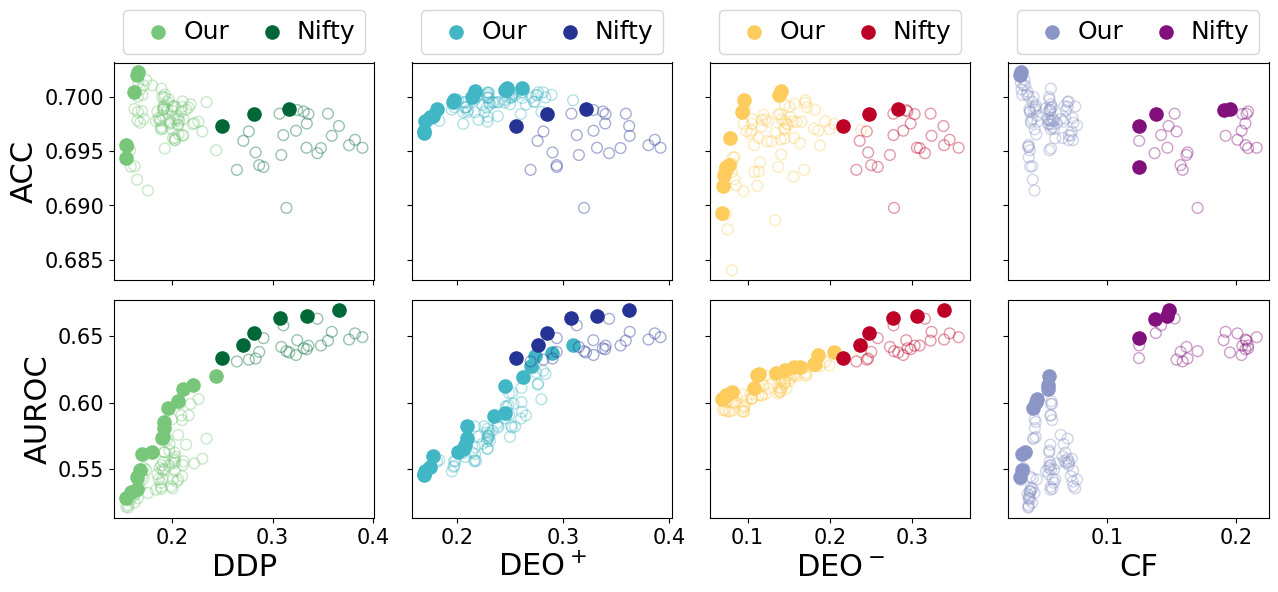

In [16]:
pl_d = {
    'DDP': {'fair_fn': f'{data}_simple_multi_ours_dp.pickle',
           'nofair_fn': f'{data}_simple_multi_nifty.pickle',
           'util_metr': 'accuracy', 'fair_metr': 'demographicParity'},
    'DEO+': {'fair_fn': f'{data}_simple_multi_ours_eop.pickle',
            'nofair_fn': f'{data}_simple_multi_nifty.pickle',
            'util_metr': 'accuracy', 'fair_metr': 'equalOpportunityPos'},
    'DEO-': {'fair_fn': f'{data}_simple_multi_ours_eon.pickle',
            'nofair_fn': f'{data}_simple_multi_nifty.pickle',
            'util_metr': 'accuracy', 'fair_metr': 'equalOpportunityNeg'},
    'CF': {'fair_fn': f'{data}_simple_multi_ours_dp.pickle',
           'nofair_fn': f'{data}_simple_multi_nifty.pickle',
           'util_metr': 'accuracy', 'fair_metr': 'counterfactual'},
}

plot_cloud_distributions_acc_roc(pl_d,
                                 phase = 'test',
                                 file_path = os.path.join('results', s, 'fd_fae'),
                                 pareto_front = True)

#### Max utility lineplot

In [ ]:
pl_d = {
    'DDP': {'fair_fn': f'{data}_simple_multi_ours.pickle',
            'nofair_fn': f'{data}_simple_multi_nifty.pickle',
            'util_metr': 'accuracy', 'fair_metr': 'demographicParity'},
    'DEO+': {'fair_fn': f'{data}_simple_multi_ours.pickle',
             'nofair_fn': f'{data}_simple_multi_nifty.pickle',
             'util_metr': 'accuracy', 'fair_metr': 'equalOpportunityPos'},
    'DEO-': {'fair_fn': f'{data}_simple_multi_ours.pickle',
             'nofair_fn': f'{data}_simple_multi_nifty.pickle',
             'util_metr': 'accuracy', 'fair_metr': 'equalOpportunityNeg'},
    'CF': {'fair_fn': f'{data}_simple_multi_ours.pickle',
           'nofair_fn': f'{data}_simple_multi_nifty.pickle',
           'util_metr': 'accuracy', 'fair_metr': 'counterfactual'},
}

plot_best_fair_wrt_util_perc_acc_roc(pl_d,
                                     phase = 'test',
                                     file_path = os.path.join('results', s, 'fd_fae',
                                                              'selection_strategy_results'))

#### table results scatterplots

In [ ]:
pl_d = {'datasets': ['german', 'bail', 'credit','pokec_z', 'facebook', 'gplus'],
        'metrics': ['demographicParity','equalOpportunityPos','equalOpportunityNeg','counterfactual']}

In [ ]:
s = 'transductive' # inductive, transductive, semiinductive
tables_cumulative_plot(pl_d, phase='test',
                       folder_path=f'results/{s}/fd_fae/selection_strategy_results')

In [ ]:
s = 'semiinductive' # inductive, transductive, semiinductive
tables_cumulative_plot(pl_d, phase='test',
                       folder_path=f'results/{s}/fd_fae/selection_strategy_results')

In [ ]:
s = 'inductive' # inductive, transductive, semiinductive
tables_cumulative_plot(pl_d, phase='test',
                       folder_path=f'results/{s}/fd_fae/selection_strategy_results')